# BehaviorNIR.jl - trigger sync example

In [1]:
using BehaviorDataNIR, HDF5, PyPlot

In [2]:
path_h5 = "/home/jungsoo/data_personal/data_raw/5HT_imaging/2021-03-20/2021-03-20-05-animal3-35-0p15atr-01.h5"

"/home/jungsoo/data_personal/data_raw/5HT_imaging/2021-03-20/2021-03-20-05-animal3-35-0p15atr-01.h5"

## Sync confocal and NIR imaging timing

In [3]:
confocal_to_nir, nir_to_confocal, timing_stack, timing_nir = sync_timing(path_h5);

### Confocal to NIR
`confocal_to_nir` has the list of NIR camera frame numbers per confocal stack. For example, during the stack 1 of the confocal, NIR camera frames [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] were acquired.

In [4]:
confocal_to_nir

400-element Array{Any,1}:
 [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
 [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
 [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
 [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
 [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
 [102, 103, 104, 105, 106, 107, 108, 109, 110, 111]
 [114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124]
 [127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
 [140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
 [152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162]
 [165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]
 [178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]
 [191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
 ⋮
 [4952, 4953, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 4961]
 [4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974]
 [4977, 4978, 4979, 4980, 4981, 4982, 4983, 4984, 4985, 4986]
 [4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999]
 [5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 

### NIR to confocal
The length of `nir_to_confocal` should be equal to the number of NIR camera frames. Each element is a conversion table to the confocal stack number. If the element is 0, it means that there was no confocal stack acquisition during that frame.

In [5]:
nir_to_confocal[200:220]

21-element Array{Float64,1}:
 13.0
  0.0
  0.0
  0.0
 14.0
 14.0
 14.0
 14.0
 14.0
 14.0
 14.0
 14.0
 14.0
 14.0
  0.0
  0.0
 15.0
 15.0
 15.0
 15.0
 15.0

## Sync stimulation/manipulation signal
To sync any stimulation/manipulaton signal, use the function `sync_stim`

In [6]:
daqmx_ai = h5read(path_h5, "daqmx_ai")
ai_laser = daqmx_ai[:,1]
ai_piezo = daqmx_ai[:,2]
ai_stim = daqmx_ai[:,3];

In [7]:
stim_to_confocal, stim_to_nir = sync_stim(ai_stim, timing_stack, timing_nir)

([0.0016460978108507314, 0.0016547100460360677, 0.0016293654682001913, 0.0016392080227011208, 0.0016479432898225778, 0.0016521088653184287, 0.0016737799953825453, 0.001654463982177913, 0.001651001163224022, 0.0016303497236526642  …  0.001646466906645275, 0.001644375363812792, 0.0016267817976458076, 0.001629365468200549, 0.0016241981270919857, 0.0016257975421990144, 0.0016218316747107922, 0.0016278890850274718, 0.0016149707322478453, 0.001631062525504322], [0.0016988785094062403, 0.0016988785094062403, 0.0016988785094062403, 0.0016988785094062403, 0.002027496797705239, 0.0013702602210475257, 0.0016988785094062403, 0.0016988785094062403, 0.0016988785094062403, 0.0016988785094062403  …  0.0013702602210475257, 0.0010416419326290671, 0.0016988785094062403, 0.002027496797705239, 0.0016988785094062403, 0.0013702602210475257, 0.0016988785094062403, 0.0013702602210475257, 0.0013702602210475257, 0.0016988785094062403])

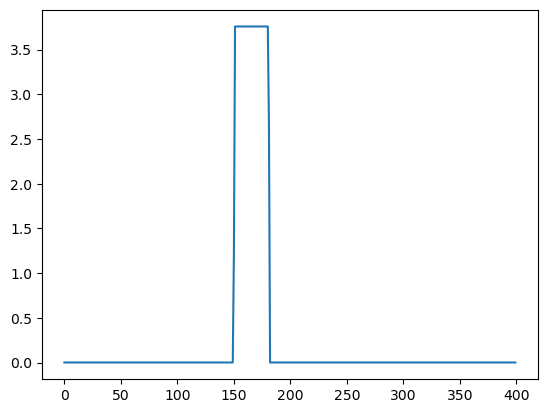

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2ab045bfd0>

In [8]:
plot(stim_to_confocal)

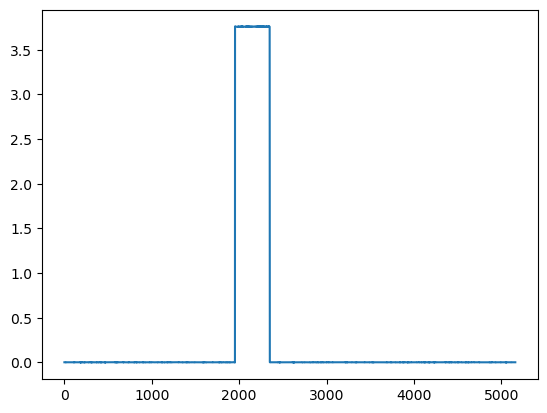

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2a84535cd0>

In [9]:
plot(stim_to_nir)

## Stack repeatability
If you'd like to check out the repeatability of some signal over the confocal stacks, use `signal_stack_repeatability`. Below, we compute and plot the piezo position repeatability.

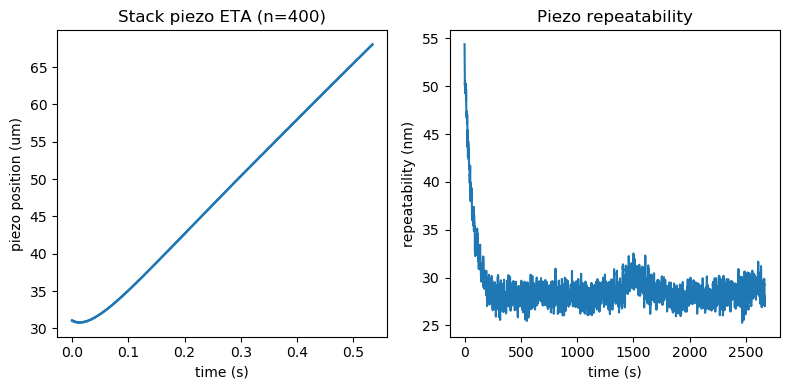

In [10]:
let
    piezo_eta_u, piezo_eta_s, t, n_stack = signal_stack_repeatability(ai_piezo, timing_stack)
    
    y1 = piezo_eta_u + piezo_eta_s
    y2 = piezo_eta_u
    y3 = piezo_eta_u - piezo_eta_s
    
    figure(figsize=(8,4))
    subplot(1,2,1)
    title("Stack piezo ETA (n=$n_stack)")
    plot(t, y1 * 10, color="C0")
    plot(t, y2 * 10, color="C0")
    plot(t, y3 * 10, color="C0")
    ylabel("piezo position (um)")
    xlabel("time (s)")
    
    subplot(1,2,2)
    title("Piezo repeatability")
    plot(piezo_eta_s * 10 * 1000)
    ylabel("repeatability (nm)")
    xlabel("time (s)")
    tight_layout()

end